In [1]:
import cv2
import warnings
warnings.filterwarnings("ignore")

from modules.model import stockChecker
from modules.utils import *

stockchecker = stockChecker()
f_video = 'KakaoTalk_20220530_123105888.mp4'

lw = 5
before_frame = None

cap = cv2.VideoCapture(f_video)

frames = []
in_human = []
if cap.isOpened():
    # fourcc = cv2.VideoWriter_fourcc(*'XVID')
    # w = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    # h = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    # fps = cap.get(cv2.CAP_PROP_FPS) 
    # video = cv2.VideoWriter(f'output_{f_video}', fourcc, fps, (w, h))
    idx = 0
    while True:
        ret, frame = cap.read()
        frames.append(frame)
        if not ret:
            break
        is_human = stockchecker.check_human(frame)
        if is_human:
            # video.write(frame)
            in_human.append(idx)
        else:
            if type(before_frame) == type(None):
                before_frame = frame
                state_cum = set()
                # video.write(frame)
            else:
                state_now = stockchecker.check(before_frame, frame)
                after_frame = frame.copy()
                state_cum = combine_state(state_cum, state_now)

                for (x, y, w, h), state in state_now:
                    if state == "zero":
                        cv2.rectangle(after_frame, (x, y), (x+w, y+h), (0, 0, 255), lw) #빨강
                    if state == 'new': 
                        cv2.rectangle(after_frame, (x, y), (x+w, y+h), (255, 0, 0), lw) #파랑
                    if state == 'sub':
                        cv2.rectangle(after_frame, (x, y), (x+w, y+h), (147, 20, 255), lw) # 자주
                    if state == 'add':
                        cv2.rectangle(after_frame, (x, y), (x+w, y+h), (255, 191, 0), lw) # 하늘
#                 # video.write(after_frame)

                before_frame = frame
          

Using cache found in /opt/ml/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-5-27 Python-3.8.13 torch-1.7.0 CUDA:0 (Tesla V100-PCIE-32GB, 32510MiB)

YOLOv5 🚀 2022-5-27 Python-3.8.13 torch-1.7.0 CUDA:0 (Tesla V100-PCIE-32GB, 32510MiB)

Fusing layers... 
Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 
Adding AutoShape... 
Fusing layers... 
Fusing layers... 
Model summary: 574 layers, 139970872 parameters, 0 gradients, 208.1 GFLOPs
Model summary: 574 layers, 139970872 parameters, 0 gradients, 208.1 GFLOPs


In [2]:
len(frames)

2402

In [29]:
def Gen():
    for i in range(10000):
        yield i
gen = Gen()

In [5]:
before = cv2.imread('KakaoTalk_20220602_183622136.jpg')
after = cv2.imread('KakaoTalk_20220602_183622136_01.jpg')

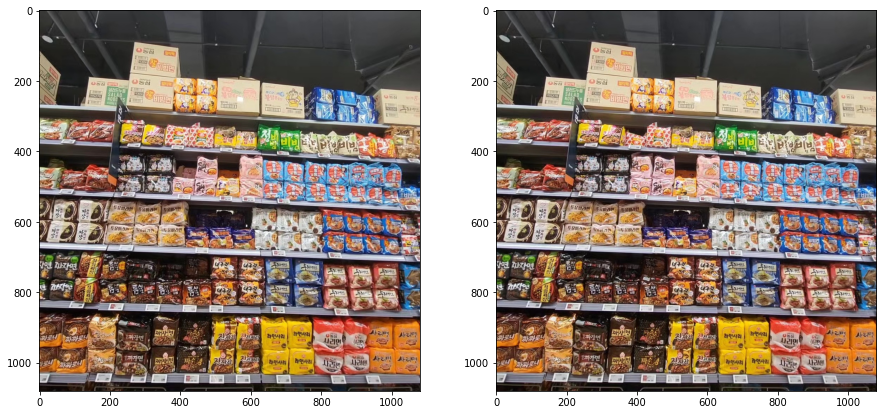

201.46692644032922
71.66764076116458


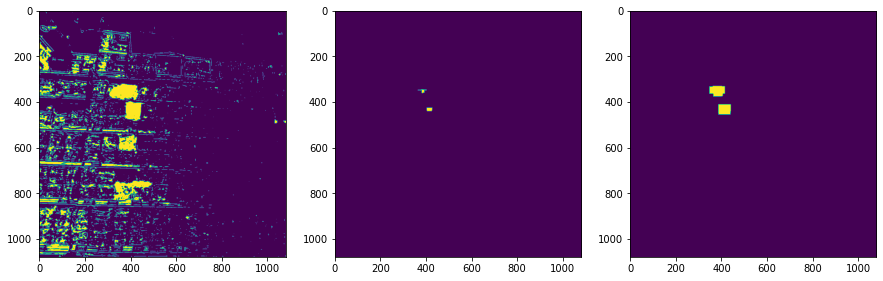

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=(15, 13))
# i = next(gen)
# print(i)
axes[0].imshow(before[..., ::-1])
axes[1].imshow(after[..., ::-1])

plt.show()

import numpy as np
from skimage.metrics import structural_similarity as compare_ssim


before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)
_, diff = compare_ssim(before_gray, after_gray, full=True)
diff = np.where(diff < 0.6, 0, diff)
diff = (diff * 255).astype("uint8")

thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
kernel = np.ones((3,3),np.uint8)
# opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=5)
erosion = cv2.erode(thresh, kernel, iterations = 20)
dilation = cv2.dilate(erosion, kernel, iterations = 15)

fig, axes = plt.subplots(1, 3, figsize=(15, 13))
axes[0].imshow(thresh)
axes[1].imshow(erosion)
axes[2].imshow(dilation)

print(diff.mean())
print(diff.std())
plt.show()

42


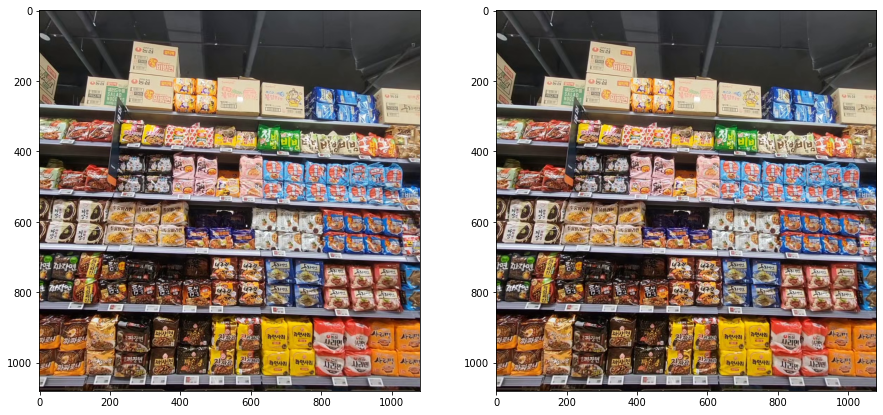

253.68325274348422
1.9595730816834007


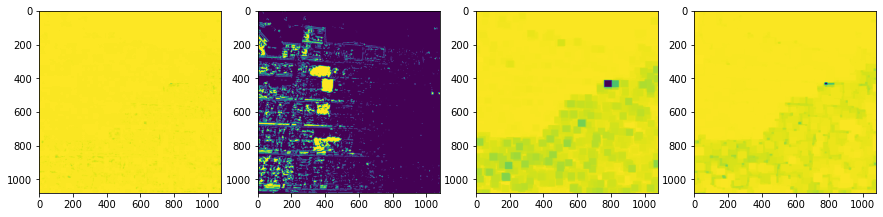

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=(15, 13))
i = next(gen)
print(i)

axes[0].imshow(frames[i][..., ::-1])
axes[1].imshow(frames[i+1][..., ::-1])

plt.show()

import numpy as np
from skimage.metrics import structural_similarity as compare_ssim


before_gray = cv2.cvtColor(frames[i], cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(frames[i+1], cv2.COLOR_BGR2GRAY)
_, diff = compare_ssim(before_gray, after_gray, full=True)
diff = np.where(diff < 0.6, 0, diff)
diff = (diff * 255).astype("uint8")

# if diff.mean() < 230:
#     diff = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
kernel = np.ones((3,3),np.uint8)
# opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=5)
erosion = cv2.erode(diff, kernel, iterations = 20)
dilation = cv2.dilate(erosion, kernel, iterations = 15)

fig, axes = plt.subplots(1, 4, figsize=(15, 13))
axes[0].imshow(diff)
axes[1].imshow(thresh)
axes[2].imshow(erosion)
axes[3].imshow(dilation)

print(diff.mean())
print(diff.std())
plt.show()

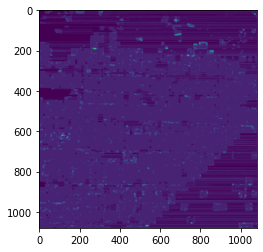

In [38]:
plt.imshow(255-diff)

30


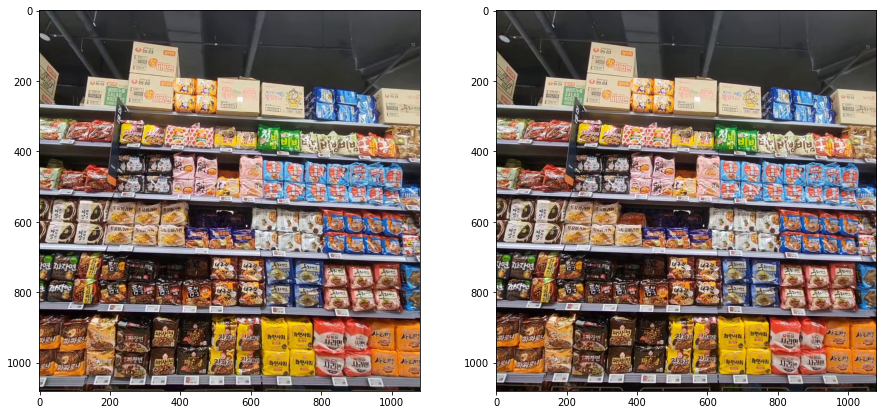

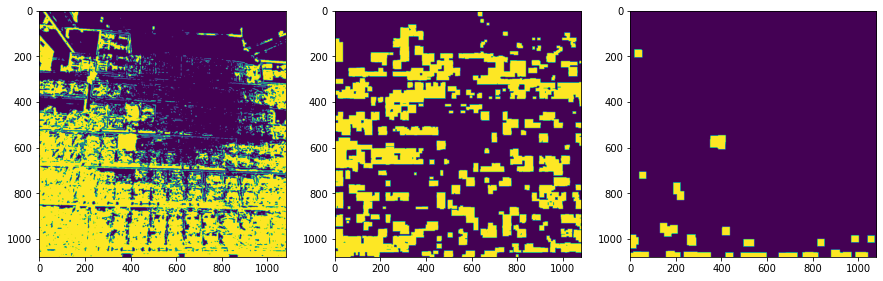

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=(15, 13))
i = next(gen)
print(i)
axes[0].imshow(frames[20][..., ::-1])
axes[1].imshow(frames[400][..., ::-1])

plt.show()

import numpy as np
from skimage.metrics import structural_similarity as compare_ssim


before_gray = cv2.cvtColor(frames[20], cv2.COLOR_RGB2GRAY)
after_gray = cv2.cvtColor(frames[400], cv2.COLOR_RGB2GRAY)
_, diff = compare_ssim(before_gray, after_gray, full=True)
diff = np.where(diff < 0.6, 0, diff)
diff = (diff * 255).astype("uint8")

thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
kernel = np.ones((3,3),np.uint8)
# opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=5)
erosion = cv2.erode(thresh, kernel, iterations = 20)
dilation = cv2.dilate(erosion, kernel, iterations = 15)

fig, axes = plt.subplots(1, 3, figsize=(15, 13))
axes[0].imshow(thresh)
axes[1].imshow(opening)
axes[2].imshow(dilation)


plt.show()

In [74]:
before_gray = cv2.cvtColor(frames[0], cv2.COLOR_RGB2GRAY)
after_gray = cv2.cvtColor(frames[1], cv2.COLOR_RGB2GRAY)
_, diff = compare_ssim(before_gray, after_gray, full=True)
# diff = np.where(diff < 0.8, 0, diff)
# diff = (diff * 255).astype("uint8")

before_gray = cv2.cvtColor(frames[1], cv2.COLOR_RGB2GRAY)
after_gray = cv2.cvtColor(frames[2], cv2.COLOR_RGB2GRAY)
_, diff2 = compare_ssim(before_gray, after_gray, full=True)
# diff2 = np.where(diff2 < 0.8, 0, diff)
# diff2 = (diff2 * 255).astype("uint8")

In [104]:
thresh = 25    # 달라진 픽셀 값 기준치 설정
max_diff = 5
draw = frames[60]

a_gray = cv2.cvtColor(frames[20], cv2.COLOR_BGR2GRAY)
b_gray = cv2.cvtColor(frames[400], cv2.COLOR_BGR2GRAY)
c_gray = cv2.cvtColor(frames[21], cv2.COLOR_BGR2GRAY)

# a-b, b-c 절대 값 차 구하기 
diff1 = cv2.absdiff(a_gray, b_gray)
diff2 = cv2.absdiff(b_gray, c_gray)

# 스레시홀드로 기준치 이내의 차이는 무시
ret, diff1_t = cv2.threshold(diff1, thresh, 255, cv2.THRESH_BINARY)
ret, diff2_t = cv2.threshold(diff2, thresh, 255, cv2.THRESH_BINARY)

# 두 차이에 대해서 AND 연산, 두 영상의 차이가 모두 발견된 경우
diff = cv2.bitwise_and(diff1_t, diff2_t)

# 열림 연산으로 노이즈 제거 ---①
k = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
diff = cv2.morphologyEx(diff, cv2.MORPH_OPEN, k)

# 차이가 발생한 픽셀이 갯수 판단 후 사각형 그리기
diff_cnt = cv2.countNonZero(diff)
if diff_cnt > max_diff:
    nzero = np.nonzero(diff)  # 0이 아닌 픽셀의 좌표 얻기(y[...], x[...])
    cv2.rectangle(draw, (min(nzero[1]), min(nzero[0])), \
                        (max(nzero[1]), max(nzero[0])), (0,255,0), 2)
    cv2.putText(draw, "Motion Detected", (10,30), \
                        cv2.FONT_HERSHEY_DUPLEX, 0.5, (0,0,255))

# 컬러 스케일 영상과 스레시홀드 영상을 통합해서 출력
stacked = np.hstack((draw, cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)))
# cv2.imshow('motion sensor',stacked )

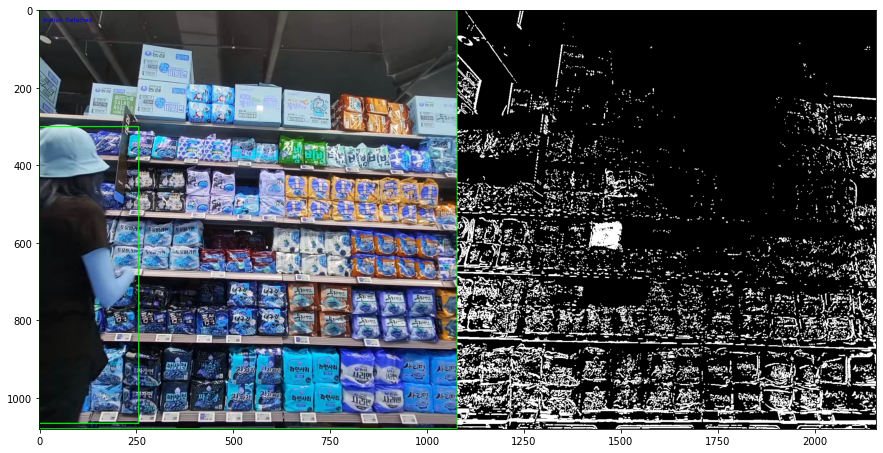

In [105]:
fig, axes = plt.subplots(1, 1, figsize=(15, 13))

axes.imshow(stacked)

In [76]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
kernel = np.ones((3,3),np.uint8)
# opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=5)
erosion = cv2.erode(thresh, kernel, iterations = 20)
dilation = cv2.dilate(erosion, kernel, iterations = 15)

fig, axes = plt.subplots(1, 3, figsize=(15, 13))
axes[0].imshow(thresh)
axes[1].imshow(opening)
axes[2].imshow(dilation)

error: OpenCV(4.5.5) /io/opencv/modules/imgproc/src/thresh.cpp:1555: error: (-2:Unspecified error) in function 'double cv::threshold(cv::InputArray, cv::OutputArray, double, double, int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 6 (CV_64FC1)


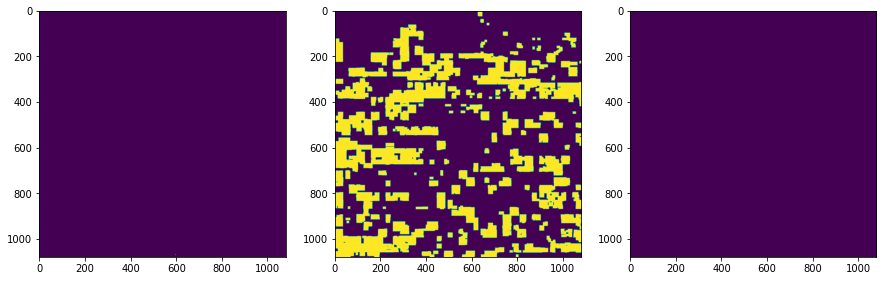

In [26]:
import numpy as np
from skimage.metrics import structural_similarity as compare_ssim


before_gray = cv2.cvtColor(frames[i], cv2.COLOR_RGB2GRAY)
after_gray = cv2.cvtColor(frames[i+1], cv2.COLOR_RGB2GRAY)
_, diff = compare_ssim(before_gray, after_gray, full=True)
diff = np.where(diff < 0.8, 0, diff)
diff = (diff * 255).astype("uint8")

thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
kernel = np.ones((3,3),np.uint8)
# opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=5)
erosion = cv2.erode(thresh, kernel, iterations = 20)
dilation = cv2.dilate(erosion, kernel, iterations = 15)

fig, axes = plt.subplots(1, 3, figsize=(15, 13))
axes[0].imshow(thresh)
axes[1].imshow(opening)
axes[2].imshow(dilation)


plt.show()